(1) Register on github.com in case you have not done this already.

Done!

(2) Initialize a new public repository for this assignment on GitHub.

Connected to the public repository Grossepieper_Nils_Assignment05

(3) For the following exercises of this assignment, follow the standard Git workflow (i.e., pull the latest version of the project to your local computer, then stage, commit, and push all the modifications that you make throughout the project). Every logical programming step should be well documented on GitHub with a meaningful commit message, so that other people (e.g., your course instructor) can follow and understand the development history. You can do this either using Shell commands or a Git GUI of your choice.

Future changes in this script will be commented on git.

(4) In the HTML file that you submit, include the hyperlink to the project repository (e.g., https://github.com/yourUserName/yourProjectName)

https://github.com/NilsGrossepieper/Grossepieper_Nils_Assignment05.git

(5) Visit the documentation website for the API provided by ticketmaster.com (see here). Familiarize yourself with the features and functionalities of the Ticketmaster Discovery API. Have a particular look at rate limits.

I have had a look at the website ticketmaster.com.
I found the following rate limits:
Limit: 5000 API calls per day
Rate limit: 5 requests per second.
Deep Paging: supports retrieving the 100th item (size * page < 1000)

(6) Whithin the scope of this assignment, you do not have to request your own API key. Instead retrieve a valid key from the API Explorer. This API key enables you to perform the GET requests needed throughout this assignment. Even though this API key is not secret per se (it is publicly visible on the API Explorer website), please comply to the common secrecy practices discussed in the lecture and the tutorial: Treat the API key as a secret token. Your API key should neither appear in the code that you are submitting nor in your public GitHub repository.

In [1]:
# First import all the necessary packages:
import numpy as np
import pandas as pd
import requests
import time

In [2]:
with open("C:/Users/gross/OneDrive/Dokumente/data/API_key_ticket_master_script.py") as script:
    exec(script.readline())

(7) Perform a first GET request, that searches for event venues in Germany (countryCode = "DE"). Extract the content from the response object and inspect the resulting list. Describe what you can see.

In [3]:
# Search for all the venues in Germany (page1) (where countryCode = "De")
con_ven_ger = requests.get("https://app.ticketmaster.com/discovery/v2/venues/",
                           params = {"apikey": ticket_master_key, "countryCode": "DE", "locale": "*"}).json()

# Print out the query:
con_ven_ger

# You can see several lists that are sublists of other lists. For each venue you can find different attributes like the name,
# the adress or the coordinates (longitude and latitude). These attributes are not located all on the same layer but longitude
# and latitude for example are located at different layers than name. At the end of the output you can see how many elements and
# pages are contained in the API request for 'DE'. In total we have 12932 elements on 647 with 20 entries per page (the last)
# page does not have the full 20 entries.

{'_embedded': {'venues': [{'name': 'Grosse Freiheit 36',
    'type': 'venue',
    'id': 'KovZpZAn6vEA',
    'test': False,
    'url': 'http://www.ticketmaster.de/venue/287636',
    'locale': 'en-de',
    'images': [{'ratio': '16_9',
      'url': 'https://s1.ticketm.net/dbimages/962v.',
      'width': 205,
      'height': 115,
      'fallback': False}],
    'postalCode': '22767',
    'timezone': 'Europe/Berlin',
    'city': {'name': 'Hamburg'},
    'country': {'name': 'Germany', 'countryCode': 'DE'},
    'address': {'line1': 'Grosse Freiheit 36'},
    'location': {'longitude': '9.957905', 'latitude': '53.551187'},
    'markets': [{'name': 'Germany', 'id': '210'}],
    'dmas': [{'id': 610}],
    'boxOfficeInfo': {'phoneNumberDetail': 'Telefon tagsüber: (040) 31 77 78- 0 Große Freiheit 36 22767 Hamburg E-Mail: info@grossefreiheit36.de'},
    'upcomingEvents': {'_total': 1, 'mfx-de': 1, '_filtered': 0},
    'ada': {'adaPhones': '+49.(0)1805 - 969 0000 (14 Ct./Min.)',
     'adaCustomCopy': 

(8) Extract the name, the city, the postalCode and address, as well as the url and the longitude and latitude of the venues to a data frame. This data frame should have the following structure:

In [4]:
# how to get page size:
size = con_ven_ger['page']['size']

# create empty vectors for all characteristics:
name = [None]*size
city = [None]*size
postalCode = [None]*size
address = [None]*size
url = [None]*size
longitude = [None]*size
latitude = [None]*size

# get the values for each page and store them
for i in range(size):
    try:
        name[i] = con_ven_ger['_embedded']['venues'][i]["name"]
    except KeyError:
        name[i] = np.nan
    try:
        city[i] = con_ven_ger['_embedded']['venues'][i]["city"]['name']
    except KeyError:
        city[i] = np.nan
    try:
        postalCode[i] = con_ven_ger['_embedded']['venues'][i]["postalCode"]
    except KeyError:
        postalCode[i] = np.nan
    try:
        address[i] = con_ven_ger['_embedded']['venues'][i]["address"]['line1']
    except KeyError:
        address[i] = np.nan
    try:
        url[i] = con_ven_ger['_embedded']['venues'][i]["url"]
    except KeyError:
        url[i] = np.nan
    try:
        longitude[i] = con_ven_ger['_embedded']['venues'][i]["location"]["longitude"]
    except KeyError:
        longitude[i] = np.nan
    try:
        latitude[i] = con_ven_ger['_embedded']['venues'][i]["location"]["latitude"]
    except KeyError:
        latitude[i] = np.nan
 # create the data fram that should be the final output of the code:   
df_venue_ger = pd.DataFrame({"name": name,
                           "city": city,
                           "postalCode": postalCode,
                           "address": address,
                           "url": url,
                           "longitude": longitude,
                           "latitude": latitude})

# this data frame displays all the necessary information:
df_venue_ger

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778
5,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.59908,49.12692
6,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.54908,49.31849
7,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.4501,51.51481
8,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.66426,49.77183
9,Eissporthalle,Memmingen,87700,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.16293,47.97999


(9) Have a closer look at the list element named page. Did your GET request from exercise (7) return all
event locations in Germany? Obviously not - there are of course much more venues in Germany than
those contained in this list. Your GET request only yielded the first results page containing the first
20 out of several thousands of venues. Check the API documentation under the section Venue Search.
How can you request the venues from the remaining results pages? Iterate over the results pages and
perform GET requests for all venues in Germany. After each iteration, extract the seven variables name,
city, postalCode, address, url, longitude, and latitude. Join the information in one large
data frame. Print the first 10 rows and the shape of the resulting data frame. The resulting data frame
should look something like this (note that the exact number of search results may have changed since
this document has been last modified):

In [32]:
# create a function that shoul give you the requested data frame:
def create_df(countryCode): 
    # create content: 
    con = requests.get("https://app.ticketmaster.com/discovery/v2/venues",
                          params = {"apikey": ticket_master_key, "countryCode": countryCode,
                                   "locale": "*"}).json()
    
    time.sleep(0.2)
    
    size = con['page']['size']
    nr_pages = con['page']['totalPages']
    # creat an empty list:
    name = [None]*1
    city = [None]*1
    postalCode = [None]*1
    address = [None]*1
    url = [None]*1
    longitude = [None]*1
    latitude = [None]*1
    # combinde the lists to a data frame:
    df_all = pd.DataFrame({"name": name,
                                   "city": city,
                                   "postalCode": postalCode,
                                   "address": address,
                                   "url": url,
                                   "longitude": longitude,
                                   "latitude": latitude})
    # let a for loop run over all pages:
    for p in range(nr_pages):
        try:
            con = requests.get("https://app.ticketmaster.com/discovery/v2/venues",
                          params = {"apikey": ticket_master_key, "countryCode": countryCode, "page": p,
                                   "locale": "*"}).json()
        except KeyError:
            con = requests.get("https://app.ticketmaster.com/discovery/v2/venues",
                          params = {"apikey": ticket_master_key, "countryCode": countryCode, "page": p,
                                   "locale": "*"}).json()
        
        if p == nr_pages-1:
            size = (con['page']['totalElements'] % size)-1
        
        # create empty vectors for all characteristics in the length 'size'
        name = [None]*size
        city = [None]*size
        postalCode = [None]*size
        address = [None]*size
        url = [None]*size
        longitude = [None]*size
        latitude = [None]*size
        # for loop over all list entries for every characteristic of the venue
        for i in range(size):
            # If a list element doesnt exist a key error occurs and the loop stops.
            # To avoid this the try-except-structure is built
            # if a KeyError occurs the value is codes as NaN
            try:
                name[i] = con['_embedded']['venues'][i]["name"]
            except KeyError:
                name[i] = np.nan
            try:
                city[i] = con['_embedded']['venues'][i]["city"]['name']
            except KeyError:
                city[i] = np.nan
            try:
                postalCode[i] = con['_embedded']['venues'][i]["postalCode"]
            except KeyError:
                postalCode[i] = np.nan
            try:
                address[i] = con['_embedded']['venues'][i]["address"]['line1']
            except KeyError:
                address[i] = np.nan
            try:
                url[i] = con['_embedded']['venues'][i]["url"]
            except KeyError:
                url[i] = np.nan
            try:
                longitude[i] = con['_embedded']['venues'][i]["location"]["longitude"]
            except KeyError:
                longitude[i] = np.nan
            try:
                latitude[i] = con['_embedded']['venues'][i]["location"]["latitude"]
            except KeyError:
                latitude[i] = np.nan
        # create dataframe based on the previous created lists
        df_venue = pd.DataFrame({"name": name,
                                   "city": city,
                                   "postalCode": postalCode,
                                   "address": address,
                                   "url": url,
                                   "longitude": longitude,
                                   "latitude": latitude})
        df_all = pd.concat([df_all, df_venue])
        time.sleep(0.2)
        
    return df_all

# all data will be displayed in this data frame:
germany_df = create_df("DE")

In [33]:
germany_df = germany_df.head(10).reset_index()
del germany_df[germany_df.columns[0]]
germany_df

,name,city,postalCode,address,url,longitude,latitude
0,None,None,None,None,None,None,None
1,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
2,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
3,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
4,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
5,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778
6,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.59908,49.12692
7,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.54908,49.31849
8,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.4501,51.51481
9,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.66426,49.77183


In [12]:
germany_df.shape[0]

12932

In [13]:
germany_df.shape[1]

9

(10) Below, you can find code that produces a map of Germany. Add points to the map indicating the
locations of the event venues across Germany.

In [14]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

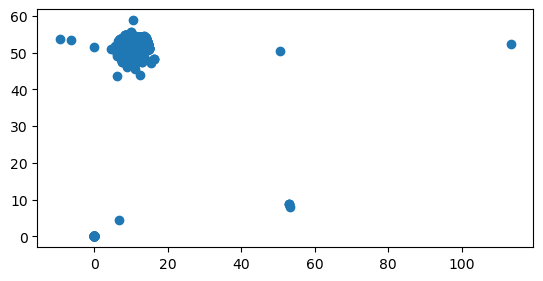

In [16]:
# Python
import geopandas as gpd

# create the df for longitude and latitude and logitude
df_ger_geo = gpd.GeoDataFrame(
    germany_df, geometry = gpd.points_from_xy(germany_df.longitude, germany_df.latitude)
)

# create the map:
# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Germany"].plot(color = "white", edgecolor = "black")
# plot the map
df_ger_geo.plot(ax = map)

# You can see that the map of Germany is really small so that you can not see anything. In addition you can see that some points
# are located outside of the map.

(11) You will find that some coordinates lie way beyond the German borders and can be assumed to be faulty.
Set coordinate values to NA where the value of longitude is outside the range (5.866, 15.042) or
where the value of latitude is outside the range (47.270, 55.059) (these coordinate ranges have
been derived from the extreme points of Germany as listed on Wikipedia (see here). For extreme points
of other countries, see here).

In [17]:
# make sure that the variables logitude and latitude are the right type:
germany_df["longitude"] = germany_df["longitude"].astype("float")
germany_df["latitude"] = germany_df["latitude"].astype("float")

<AxesSubplot:>

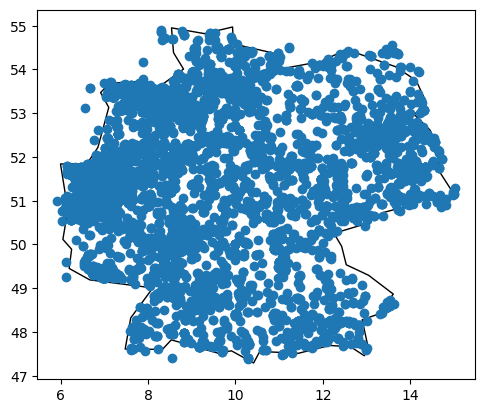

In [18]:
# write a function to adjust the longitude / latitude
# if these values aren't within the specific range for the country -> coded as NA
def adjust_long_lat(df, long_low, long_up, lat_low, lat_up):
    df.loc[df["longitude"] < long_low, "longitude"] = np.nan
    df.loc[df["longitude"] > long_up, "longitude"] = np.nan
    df.loc[df["latitude"] < lat_low, "latitude"] = np.nan
    df.loc[df["latitude"] > lat_up, "latitude"] = np.nan
    # return adjusted dataframe
    return df

# give the maximal and minimal latitude information
germany_df = adjust_long_lat(germany_df, 5.866, 15.042, 47.270, 55.059)

# create the df for longitude and latitude and logitude
df_ger_geo = gpd.GeoDataFrame(
    germany_df, geometry = gpd.points_from_xy(germany_df.longitude, germany_df.latitude)
)

# create the map:
# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Germany"].plot(color = "white", edgecolor = "black")
# plot the map
df_ger_geo.plot(ax = map)

# The new data frame gives you a much better format where you can see all points
# very clear. Only some points are still located outside of Germany.

(12) Repeat exercises (9)–(11) for another European country of your choice. (Hint: Clean code pays off! If
you have coded the exercises efficiently, only very few adaptions need to be made.)

In [19]:
# I will do the exercises 9 to 11 with the country Poland and its country 
# code 'PL'

# Exercise 9
poland_df = create_df("PL")

In [29]:
poland_df = poland_df.head(10).reset_index()
del poland_df[poland_df.columns[0]]
poland_df

,name,city,postalCode,address,url,longitude,latitude,geometry
0,None,None,None,None,None,NaN,NaN,POINT EMPTY
1,Kinoteatr Rialto,Katowice,40-012,ul. Świętego Jana 24,https://www.ticketmaster.pl/venue/kinoteatr-ri...,19.02140,50.25658,POINT (19.02140 50.25658)
2,BARdzo bardzo,Warsaw,00-513,ul. Nowogrodzka 11,https://www.ticketmaster.pl/venue/bardzo-bardz...,21.01789,52.22931,POINT (21.01789 52.22931)
3,Klub U Bulka,Sulęcin,69-200,Moniuszki 1,https://www.ticketmaster.pl/venue/klub-u-bulka...,15.10658,52.43688,POINT (15.10658 52.43688)
4,Centrum Kultury Wiatrak,Zabrze,41-700,ul. Wolności 395,https://www.ticketmaster.pl/venue/centrum-kult...,18.80782,50.29463,POINT (18.80782 50.29463)
5,Teatr Ziemi Rybnickiej,Rybnik,44-100,plac Teatralny 1,https://www.ticketmaster.pl/venue/teatr-ziemi-...,18.54602,50.09551,POINT (18.54602 50.09551)
6,Klub B17,Poznan,60-381,ul. Bułgarska 17,https://www.ticketmaster.pl/venue/klub-b17-poz...,16.85904,52.39726,POINT (16.85904 52.39726)
7,Centrum Spotkania Kultur,Lublin,20-029,Plac Teatralny 1,https://www.ticketmaster.pl/venue/centrum-spot...,22.54866,51.24698,POINT (22.54866 51.24698)
8,Stadion Śląski,Chorzów,41-500,Katowicka 10,https://www.ticketmaster.pl/venue/stadion-slas...,18.96628,50.28792,POINT (18.96628 50.28792)
9,CKK Jordanki,Toruń,87-100,aleja Solidarności 1-3,https://www.ticketmaster.pl/venue/ckk-jordanki...,18.60195,53.01391,POINT (18.60195 53.01391)


In [24]:
poland_df.shape[0]

994

In [25]:
poland_df.shape[1]

7

In [26]:
# Exercise 10

# make sure that the variables logitude and latitude are the right type:
poland_df["longitude"] = poland_df["longitude"].astype("float")
poland_df["latitude"] = poland_df["latitude"].astype("float")

<AxesSubplot:>

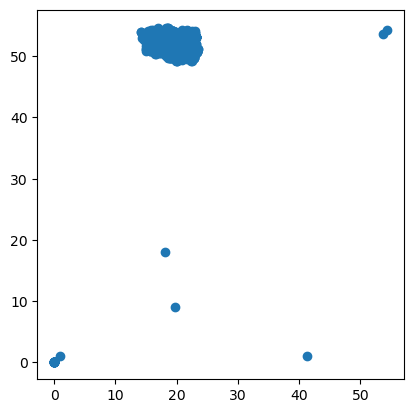

In [27]:
# create the df for longitude and latitude and logitude
df_pl_geo = gpd.GeoDataFrame(
    poland_df, geometry = gpd.points_from_xy(poland_df.longitude, poland_df.latitude)
)

# create the map:
# get a base map of Poland
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Poland"].plot(color = "white", edgecolor = "black")
# plot the map
df_pl_geo.plot(ax = map)

# You can see that the map of Poland is really small so that you can not see anything.
# In addition you can see that some points are located outside of the map.

<AxesSubplot:>

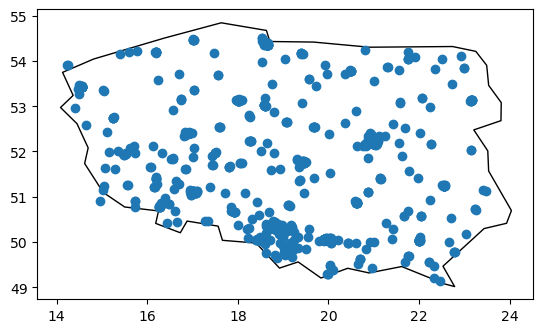

In [28]:
# Exercise 11

# Maximum longitude and latitude of Poland:
poland_df = adjust_long_lat(poland_df, 14.123, 24.146, 49.002, 54.502)

# create the df for longitude and latitude and logitude
df_pl_geo = gpd.GeoDataFrame(
    poland_df, geometry = gpd.points_from_xy(poland_df.longitude, poland_df.latitude)
)

# create the map:
# get a base map of Poland
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Poland"].plot(color = "white", edgecolor = "black")
# plot the map
df_pl_geo.plot(ax = map)

# The new data frame gives you a much better format where you can see all points
# very clear. Only some points are still located outside of Poland.